#### Create a model to predict the salary of person if we get  the age and gender as input.


Multiple Linear Regression or MLR is the type of  regression in which we predict a value using two  or more features 
like predicting the weight of a  person using the age and height values. <br>
 

In [1]:
import pandas  
from sklearn import linear_model  
from sklearn import metrics
from sklearn import preprocessing  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split



In [2]:
dt = pandas.read_csv('data/Mall_Customers.csv') 
dt 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
Enc = preprocessing.LabelEncoder()  
Enc.fit(['Male','Female'])  
dt['Genre'] = Enc.transform(dt['Genre'])  
dt.head() 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [4]:
X = dt.drop(columns=['CustomerID','Annual Income (k$)',  'Spending Score (1-100)'])  
Y = dt.drop(columns=['CustomerID',  'Genre','Age',  'Spending Score (1-100)'])  
X_train,X_test,Y_train,Y_test = train_test_split (X,Y,test_size=0.1)

In [5]:
#Training Model.  
RegModel = linear_model.LinearRegression()  
RegModel.fit(X_train,Y_train) 

LinearRegression()

In [6]:
dt['Age'].max()-dt['Age'].min()

52

In [7]:
RegModel.predict([[0,30],[1,42]])

/Users/jigishap/.pyenv/versions/MachineLearning/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[59.8035595 ],
       [62.84263635]])

As Female and  Male are encoded as 0 and 1, we pass [[0,30],  [1,42]] and our model is telling that a 30 years  old female earns about 60.5k and 42 years old male  earns about 62k.

<AxesSubplot: >

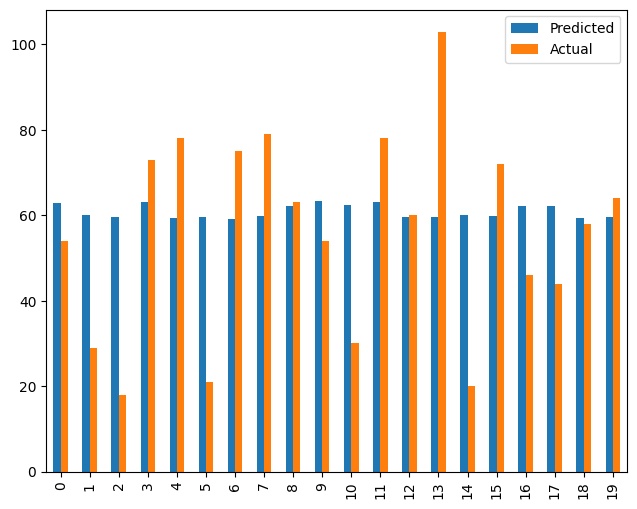

In [8]:
#predict the test input  and compare the results with actual ones 

pred_y = RegModel.predict(X_test)  
cmp = pandas.DataFrame({'Predicted':pred_y.flatten(),'Actual':Y_test['Annual Income (k$)'].values})  
cmp.plot(kind='bar',figsize=(7.5,6)) 
